In [3]:
# importing libraries
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy
from sklearn.model_selection import train_test_split
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Flatten, Dropout
warnings.filterwarnings('ignore')
import keras
import np_utils
import math
model = load_model('model.h5')
import time

In [84]:
labels = ["Downstairs",  "Jogging",  "Sitting",  "Standing",  "Upstairs",  "Walking"]
with open("src/data/Subiendo escaleras.csv",'r') as f:
    with open("updated_test.csv",'w') as f1:
        next(f) # skip header line
        headers = next(f)
        for line in f:
            f1.write(line)
            
input_labels = ["ACCELEROMETER X (m/s²)", "ACCELEROMETER Y (m/s²)", "ACCELEROMETER Z (m/s²)"]
#input_labels = ["YYYY-MO-DD HH-MI-SS_SSS\n", "LINEAR ACCELERATION X (m/s²)","LINEAR ACCELERATION Y (m/s²)","LINEAR ACCELERATION Z (m/s²)"]
columns = headers.split(";")
df_har = pd.read_csv('updated_test.csv', header = None,sep= ";", names = columns)
df_har = df_har[input_labels]

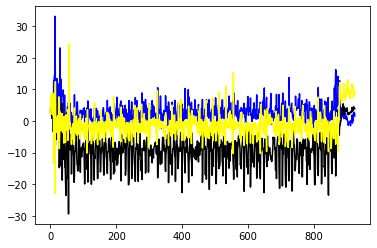

In [82]:
plt.plot(df_har.index, df_har[input_labels[0]], "b-")
plt.plot(df_har.index, df_har[input_labels[1]], "b-", c="black")
plt.plot(df_har.index, df_har[input_labels[2]], "b-", c="yellow")

In [78]:
import numpy as np
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt
# Filter requirements.
order = 3
fs = 50.0       # sample rate, Hz
cutoff = 4.00  # desired cutoff frequency of the filter, Hz
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

y = butter_lowpass_filter(df_har[input_labels[1]], cutoff, fs, order)

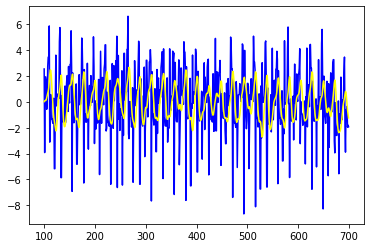

In [618]:
plt.plot(df_har.index, df_har[input_labels[1]], "b-")
plt.plot(df_har.index, y, "yellow")

In [85]:
#Each generated sequence (or window) contains 50 records corresponding to 2.5 secs of activity 
#(recall that the frequency of the data collection as mentioned in the source website is 20 Hz).
random_seed = 42   
n_time_steps = 50
n_features = 3 
tot = df_har.shape[0]
end = tot
base = math.floor(tot / n_time_steps / n_features)
start = base * n_time_steps * n_features
df_har.drop(df_har.index[start:end],0,inplace=True)
step = 10 
n_classes = 6 
n_epochs = 50       
batch_size = 1024   
learning_rate = 0.0025
l2_loss = 0.0015
segments = []

for i in range(0,  df_har.shape[0]- n_time_steps, step):  

    xs = df_har[input_labels[0]].values[i: i + n_time_steps]

    ys = df_har[input_labels[1]].values[i: i + n_time_steps]

    zs = df_har[input_labels[2]].values[i: i + n_time_steps]

    segments.append([xs, ys, zs])

#reshape the segments which is (list of arrays) to a list
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, n_time_steps, n_features)
arr = np.asarray(df_har, dtype= np.float32).reshape(-1, n_time_steps, n_features)
predict_x = model.predict(arr) 
classes_x=np.argmax(predict_x, axis=1)
maxx = max(classes_x)


classes_x

array([5, 5, 5, 5, 1, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5])

In [86]:
from collections import OrderedDict,Counter
def group_list(lst):
      
    return list(zip(Counter(lst).keys(), Counter(lst).values()))
dct = dict(group_list(list(classes_x)))

#for e in dct,values:
#    dct[labels[e]] = dct.pop(e)

dct


NameError: name 'stats' is not defined

In [89]:
new_dict = {}

for e in dct:
    new_dict[labels[e]] = dct[e]
    
new_dict
max(new_dict, key=new_dict.get)

'Walking'

In [99]:
df = pd.DataFrame.from_records([new_dict]).T
df.columns = ["Qty"]
df

,Qty
Walking,16
Jogging,2


In [233]:

#Each generated sequence (or window) contains 50 records corresponding to 2.5 secs of activity 
#(recall that the frequency of the data collection as mentioned in the source website is 20 Hz).
random_seed = 42   
n_time_steps = 50
n_features = 3 
tot = df_har.shape[0]
end = tot
base = math.floor(tot / n_time_steps / n_features)
start = base * n_time_steps * n_features
df_har.drop(df_har.index[start:end],0,inplace=True)
step = 10 
n_classes = 6 
n_epochs = 50       
batch_size = 1024   
learning_rate = 0.0025
l2_loss = 0.0015
segments = []

for i in range(0,  df_har.shape[0]- n_time_steps, step):  

    xs = pd.DataFrame(butter_lowpass_filter(df_har[input_labels[0]], cutoff, fs, order)).values[i: i + n_time_steps]

    ys = pd.DataFrame(butter_lowpass_filter(df_har[input_labels[1]], cutoff, fs, order)).values[i: i + n_time_steps]

    zs = pd.DataFrame(butter_lowpass_filter(df_har[input_labels[2]], cutoff, fs, order)).values[i: i + n_time_steps]

    segments.append([xs, ys, zs])

#reshape the segments which is (list of arrays) to a list
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, n_time_steps, n_features)
arr = np.asarray(df_har, dtype= np.float32).reshape(-1, n_time_steps, n_features)
predict_x = model.predict(arr) 
classes_x=np.argmax(predict_x, axis=0)
maxx = max(classes_x)
print(labels[np.where(classes_x == maxx)[0][0]])


classes_x

Standing


array([16,  7, 14, 23, 16, 19])

In [172]:
test = []
for e in predict_x: 
    print(max(e))
    print(np.argmax(e, axis = 0))
    test.append(np.where(e == max(e))[0][0])
test

0.56291133
1
0.8604299
1
0.58777606
1
0.87348723
1
0.5303414
1
0.80332214
1
0.5853394
1
0.65625745
1
0.58637244
1
0.6739319
1
0.5273398
1
0.63175964
1
0.5718764
1
0.6867316
1
0.63685614
1
0.7936913
1
0.60153574
1
0.728471
1
0.5489969
1
0.77355355
1
0.54380983
1
0.92785025
1
0.61687034
1
0.91683257
1
0.55996805
1
0.9230334
1
0.55052865
1
0.90637857
1
0.6799083
1
0.7230835
1
0.5887584
1
0.76005185
1


[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [547]:
segments

[[array([-3.6605, -3.6605, -2.4589, -2.4589, -2.4589, -2.4589, -1.8328,
         -1.8328, -1.8328, -1.8328, -1.8328, -0.9338, -0.9338, -0.9338,
         -0.9338, -2.4647, -2.4647, -2.4647, -4.4274, -4.4274, -4.4274,
         -4.4274, -3.6028, -3.6028, -3.6028, -3.6028, -3.6028, -3.4931,
         -3.4931, -0.5486, -0.5486, -0.5486, -0.5486, -0.5486, -0.5486,
          0.0456,  0.0456,  0.0456, -5.1056, -5.1056]),
  array([1.7579, 1.7579, 3.3932, 3.3932, 3.3932, 3.3932, 4.2084, 4.2084,
         4.2084, 4.2084, 4.2084, 4.4096, 4.4096, 4.4096, 4.4096, 4.6639,
         4.6639, 4.6639, 4.5623, 4.5623, 4.5623, 4.5623, 4.9435, 4.9435,
         4.9435, 4.9435, 4.9435, 4.1447, 4.1447, 5.5268, 5.5268, 5.5268,
         5.5268, 5.5268, 5.5268, 6.287 , 6.287 , 6.287 , 4.1443, 4.1443]),
  array([ 4.2022,  4.2022,  4.5947,  4.5947,  4.5947,  4.5947,  5.0522,
          5.0522,  5.0522,  5.0522,  5.0522,  2.8691,  2.8691,  2.8691,
          2.8691,  1.9322,  1.9322,  1.9322, -1.5004, -1.5004, -1.5004,
 

In [488]:
classes_x=np.argmax(predict_x, axis=1)
classes_x

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [340]:
# reading raw data file
columns = ['user','activity','timestamp', 'x-axis', 'y-axis', 'z-axis']
df = pd.read_csv('WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt', header = None, names = columns)

In [160]:
 # removing null values
df_har = df_har.dropna()
df_har.shape
# transforming the z-axis to float
df_har['z-axis'] = df_har['z-axis'].str.replace(';', '')
df_har['z-axis'] = df_har['z-axis'].apply(lambda x:float(x))
# drop rows where timestamp is 0
df = df_har[df_har['timestamp'] != 0]
# arrange data in ascending order of user and timestamp
df = df.sort_values(by = ['user', 'timestamp'], ignore_index=True)
df

,user,activity,timestamp,x-axis,y-axis,z-axis
0,1,Walking,4991922345000,0.69,10.80,-2.030000
1,1,Walking,4991972333000,6.85,7.44,-0.500000
2,1,Walking,4992022351000,0.93,5.63,-0.500000
3,1,Walking,4992072339000,-2.11,5.01,-0.690000
4,1,Walking,4992122358000,-4.59,4.29,-1.950000
...,...,...,...,...,...,...
1085355,36,Standing,15049012250000,-0.91,9.43,2.533385
1085356,36,Standing,15049062268000,-1.18,9.51,2.492524
1085357,36,Standing,15049112287000,-1.50,9.53,2.533385
1085358,36,Standing,15049162275000,-2.07,8.77,2.179256


In [163]:
test = df[df["user"]==1]
test = test[test["activity"] == 'Walking']
test

,user,activity,timestamp,x-axis,y-axis,z-axis
0,1,Walking,4991922345000,0.69,10.80,-2.03
1,1,Walking,4991972333000,6.85,7.44,-0.50
2,1,Walking,4992022351000,0.93,5.63,-0.50
3,1,Walking,4992072339000,-2.11,5.01,-0.69
4,1,Walking,4992122358000,-4.59,4.29,-1.95
...,...,...,...,...,...,...
17855,1,Walking,5974702314000,-2.87,6.55,-0.04
17856,1,Walking,5974702314000,-2.87,6.55,-0.04
17857,1,Walking,5974772290000,0.61,19.46,12.22
17858,1,Walking,5974822278000,-1.31,12.07,-0.46


In [12]:
df_har = pd.read_csv("src/data/jog.csv").iloc[1: , :]
df_har

,sep=;
1,-7.3459;-3.48;6.618;-3.6392;7.0294;5.7844;5.55...
2,-6.058;-4.547;1.7921;-6.0382;7.6327;1.2163;3.3...
3,-4.21;-4.904;-5.835;-6.1579;5.8131;-4.9512;0.8...
4,-3.506;-5.1941;-8.346;-4.9704;2.5379;-8.0637;-...
5,-2.4;-5.727;-9.198;-5.2577;1.6376;-8.1163;-3.2...
...,...
848,-7.499;4.9931;16.508;2.5905;3.9696;8.5856;5.34...
849,-5.979;4.344;15.132;2.8539;3.6152;8.6574;2.834...
850,-4.976;4.217;11.13;3.2992;3.8547;8.3941;1.6473...
851,-5.0449;3.6671;8.1761;3.5482;4.9464;7.6902;1.5...


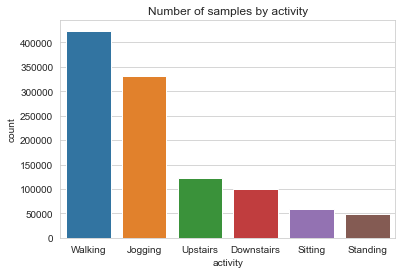

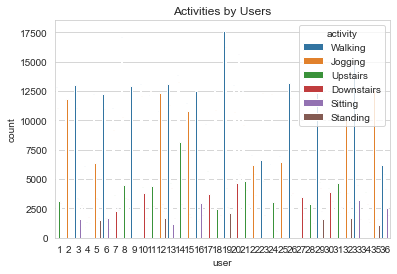

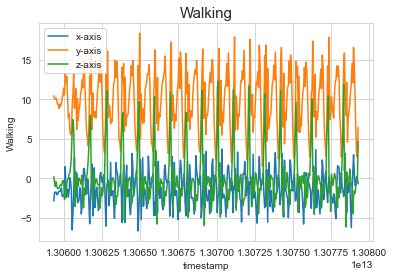

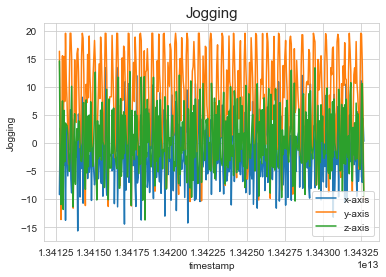

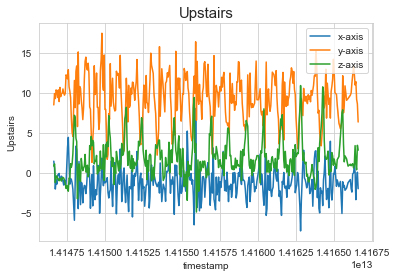

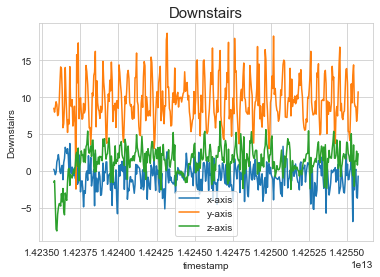

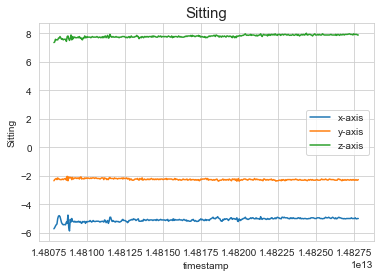

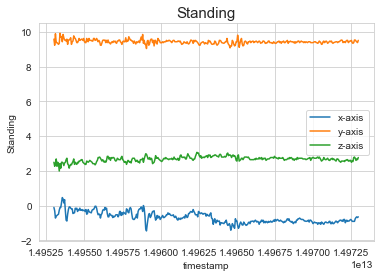

In [34]:
#streamlit
sns.set_style("whitegrid")
sns.countplot(x = "activity", data = df)
plt.title("Number of samples by activity")
plt.show()
sns.countplot(x = "user",  hue = "activity", data = df)
plt.title("Activities by Users")
plt.show()
#streamlit
activities = ["Walking", "Jogging", "Upstairs", "Downstairs", "Sitting", "Standing"]
for i in activities:
    data36 = df[(df["user"] == 36) & (df["activity"] == i)][:400]
    sns.lineplot(y = "x-axis", x = "timestamp", data = data36)
    sns.lineplot(y = "y-axis", x = "timestamp", data = data36)
    sns.lineplot(y = "z-axis", x = "timestamp", data = data36)
    plt.legend(["x-axis", "y-axis", "z-axis"])
    plt.ylabel(i)
    plt.title(i, fontsize = 15)
    plt.show()

In [38]:
#Each generated sequence (or window) contains 50 records corresponding to 2.5 secs of activity 
#(recall that the frequency of the data collection as mentioned in the source website is 20 Hz).
random_seed = 42   
n_time_steps = 50 
n_features = 3 
step = 10 
n_classes = 6 
n_epochs = 50       
batch_size = 1024   
learning_rate = 0.0025
l2_loss = 0.0015
segments = []
labels = []

for i in range(0,  df.shape[0]- n_time_steps, step):  

    xs = df['x-axis'].values[i: i + 50]

    ys = df['y-axis'].values[i: i + 50]

    zs = df['z-axis'].values[i: i + 50]

    label = scipy.stats.mode(df['activity'][i: i + 50])[0][0]

    segments.append([xs, ys, zs])

    labels.append(label)

#reshape the segments which is (list of arrays) to a list
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, n_time_steps, n_features)

labels = np.asarray(pd.get_dummies(labels), dtype = np.float32)

In [39]:
reshaped_segments.shape

(108531, 50, 3)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(reshaped_segments, labels, test_size = 0.2, random_state = random_seed)

In [47]:
model = Sequential()
# RNN layer
model.add(LSTM(units = 128, input_shape = (X_train.shape[1], X_train.shape[2])))
# Dropout layer
model.add(Dropout(0.5)) 
# Dense layer with ReLu
model.add(Dense(units = 64, activation='relu'))
# Softmax layer
model.add(Dense(y_train.shape[1], activation = 'softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               67584     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 390       
Total params: 76,230
Trainable params: 76,230
Non-trainable params: 0
_________________________________________________________________


In [49]:
history = model.fit(X_train, y_train, epochs = n_epochs, validation_split = 0.20, batch_size = batch_size, verbose = 1)

Epoch 1/50
68/68 [==============================] - 32s 440ms/step - loss: 0.9262 - accuracy: 0.6723 - val_loss: 0.5587 - val_accuracy: 0.8062
Epoch 2/50
68/68 [==============================] - 29s 428ms/step - loss: 0.5269 - accuracy: 0.8128 - val_loss: 0.4688 - val_accuracy: 0.8268
Epoch 3/50
68/68 [==============================] - 33s 479ms/step - loss: 0.4659 - accuracy: 0.8314 - val_loss: 0.4377 - val_accuracy: 0.8370
Epoch 4/50
68/68 [==============================] - 35s 510ms/step - loss: 0.4175 - accuracy: 0.8464 - val_loss: 0.3861 - val_accuracy: 0.8529
Epoch 5/50
68/68 [==============================] - 29s 429ms/step - loss: 0.3835 - accuracy: 0.8584 - val_loss: 0.3550 - val_accuracy: 0.8651
Epoch 6/50
68/68 [==============================] - 30s 435ms/step - loss: 0.3546 - accuracy: 0.8694 - val_loss: 0.3221 - val_accuracy: 0.8802
Epoch 7/50
68/68 [==============================] - 31s 464ms/step - loss: 0.3227 - accuracy: 0.8788 - val_loss: 0.3049 - val_accuracy: 0.8853

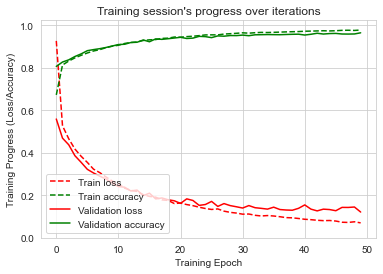

In [50]:
plt.plot(np.array(history.history['loss']), "r--", label = "Train loss")
plt.plot(np.array(history.history['accuracy']), "g--", label = "Train accuracy")
plt.plot(np.array(history.history['val_loss']), "r-", label = "Validation loss")
plt.plot(np.array(history.history['val_accuracy']), "g-", label = "Validation accuracy")
plt.title("Training session's progress over iterations")
plt.legend(loc='lower left')
plt.ylabel('Training Progress (Loss/Accuracy)')
plt.xlabel('Training Epoch')
plt.ylim(0) 
plt.show()

In [51]:
model.save("model.h5")